In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [42]:
#Loading the dataset
#Display the dataframe information
df=pd.read_csv('breastcancer.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [43]:
#Display the first tuples of the dataset
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [44]:
#Display the last tuples of the dataset
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [45]:
# Display the descriptive statistics
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [46]:
#Display the class label distribution
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

C:\Users\Stanley\AppData\Local\Temp\ipykernel_11128\2695516881.py:2: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df['diagnosis']):
C:\Users\Stanley\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Stanley\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


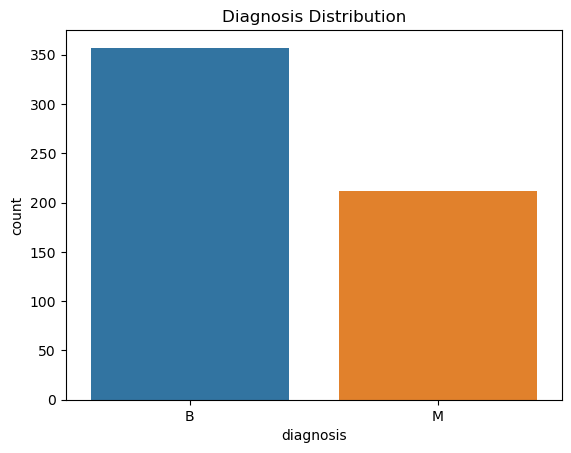

In [47]:
#Use seaborn to display count plot for the class label
if pd.api.types.is_categorical_dtype(df['diagnosis']):
    sns.countplot(x='diagnosis', data=df)
else:
    sns.countplot(x='diagnosis', data=df.astype({'diagnosis': 'category'}))

plt.title('Diagnosis Distribution')
plt.show()

C:\Users\Stanley\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Stanley\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Stanley\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Stanley\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

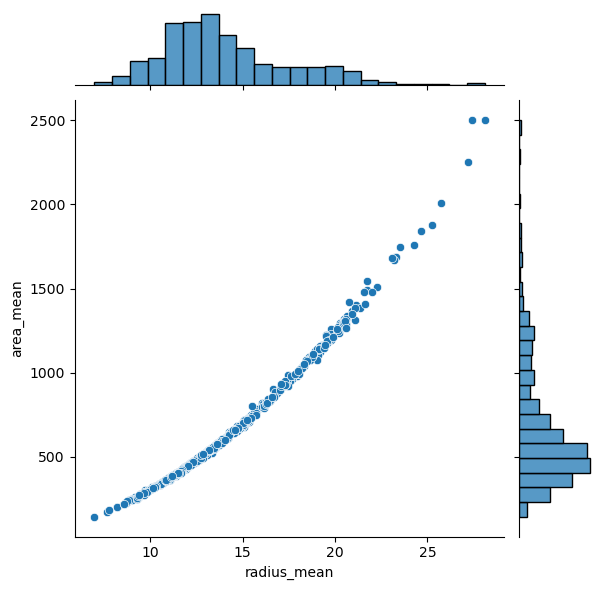

In [48]:
#Use seaborn to display a joint plot with any two variables of your choice.
sns.jointplot(x='radius_mean',y='area_mean',data=df,kind='scatter')
plt.show()

In [49]:
#numerical representation of categorical data
label_encoder = LabelEncoder()
df['diagnosis_encoded'] = label_encoder.fit_transform(df['diagnosis'])

In [50]:
# Print unique values in the 'diagnosis_encoded' column
unique_values = df['diagnosis_encoded'].unique()
print("Unique values in 'diagnosis_encoded':", unique_values)


Unique values in 'diagnosis_encoded': [1 0]


In [51]:
#split the data such that 25% is reserved for testing
y=df['diagnosis']
X=df.drop('diagnosis',axis=1)
X = X.drop('Unnamed: 32', axis = 1) 
X = X.drop('id', axis = 1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=39)

In [78]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [52]:
#Show the shape of training set and test set
print("\nShape of Training Set:",X_train.shape,y_train.shape)
print("Shape of Test Set:",X_test.shape,y_test.shape)


Shape of Training Set: (426, 31) (426,)
Shape of Test Set: (143, 31) (143,)


In [53]:
# Assuming X_train has feature names, set them in the scaler
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [54]:
#finding the value of k by finding squareroot of number of samples in the X_train
import math
sqrt_n_samples=math.isqrt(X_train.shape[0])
#Display the squareroot 
print("Square root of number of samples:",sqrt_n_samples)

Square root of number of samples: 20


In [55]:
# Initialize and train the k-NN classifier
k_value = 9
knn_classifier = KNeighborsClassifier(n_neighbors=k_value)
knn_classifier.fit(X_train_standardized, y_train)

KNeighborsClassifier(n_neighbors=9)

In [56]:
# Make predictions on the standardized test set
y_pred = knn_classifier.predict(X_test_standardized)

In [57]:
# a. Show the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[91  0]
 [ 1 51]]


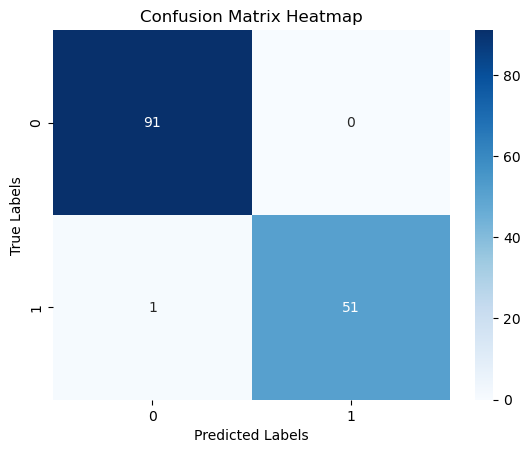

In [58]:
# b. Show the heat map
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [59]:
# c. Show the classification accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nClassification Accuracy: {accuracy * 100:.2f}%")


Classification Accuracy: 99.30%


In [60]:
# Compare the training and testing accuracy
train_accuracy = knn_classifier.score(X_train_standardized, y_train)
test_accuracy = knn_classifier.score(X_test_standardized, y_test)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 99.77%
Testing Accuracy: 99.30%


In [61]:
#SUPPORT VECTOR MACHINE
# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train_standardized, y_train)

SVC(kernel='linear')

In [62]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_standardized)

In [63]:
# a. Show the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[91  0]
 [ 0 52]]


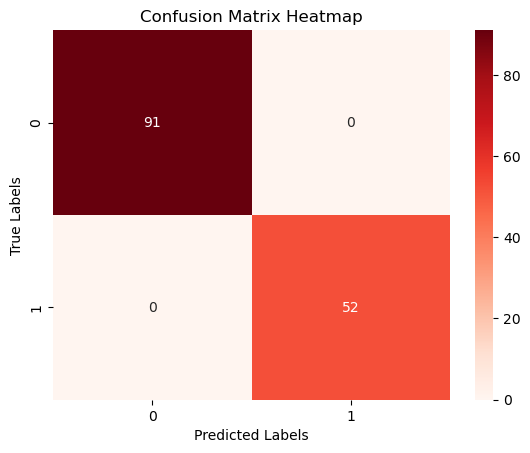

In [64]:
# b. Show the heat map
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [65]:
# c. Show the classification accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nClassification Accuracy: {accuracy * 100:.2f}%")



Classification Accuracy: 100.00%


In [66]:
# Compare the training and testing accuracy
train_accuracy = svm_classifier.score(X_train_standardized, y_train)
test_accuracy = svm_classifier.score(X_test_standardized, y_test)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 100.00%
Testing Accuracy: 100.00%


In [67]:
#DECISION TREE 
dt_classifier = DecisionTreeClassifier(random_state=42) 
dt_classifier.fit(X_train_standardized, y_train)

DecisionTreeClassifier(random_state=42)

In [68]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test_standardized)

In [69]:
# a. Show the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[91  0]
 [ 0 52]]


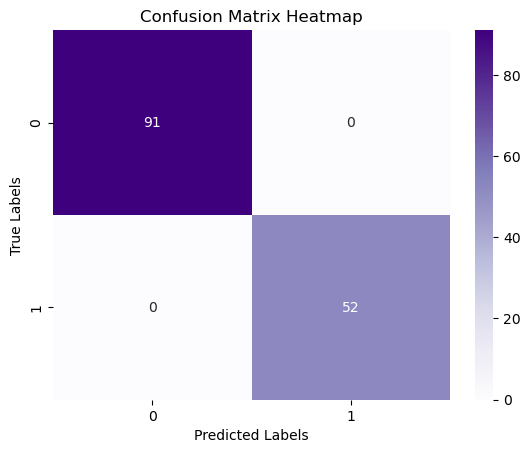

In [70]:
# b. Show the heat map
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [71]:
# c. Show the classification accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nClassification Accuracy: {accuracy * 100:.2f}%")


Classification Accuracy: 100.00%


In [72]:
# Compare the training and testing accuracy
train_accuracy = dt_classifier.score(X_train_standardized, y_train)
test_accuracy = dt_classifier.score(X_test_standardized, y_test)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 100.00%
Testing Accuracy: 100.00%


In [73]:
#RANDOM FOREST
# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=80, random_state=40) 
rf_classifier.fit(X_train_standardized, y_train)

RandomForestClassifier(n_estimators=80, random_state=40)

In [74]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_standardized)

In [75]:
# a. Show the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[91  0]
 [ 0 52]]


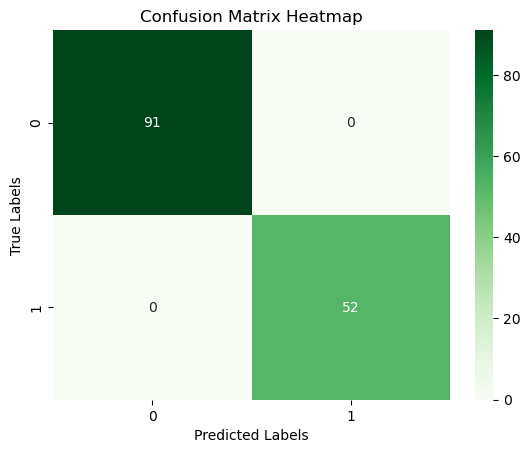

In [76]:
# b. Show the heat map
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [77]:
# c. Show the classification accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nClassification Accuracy: {accuracy * 100:.2f}%")


Classification Accuracy: 100.00%


In [39]:
# Compare the training and testing accuracy
train_accuracy = rf_classifier.score(X_train_standardized, y_train)
test_accuracy = rf_classifier.score(X_test_standardized, y_test)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 100.00%
Testing Accuracy: 100.00%


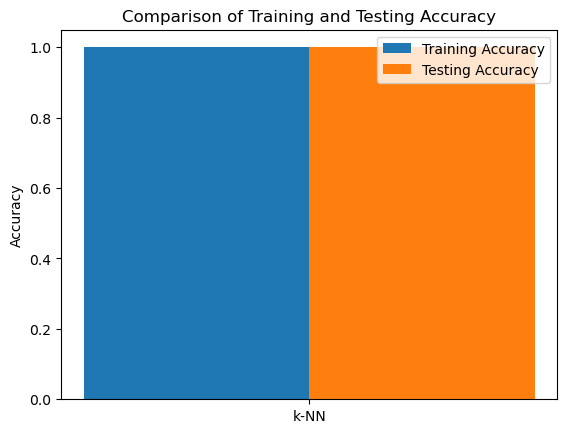

In [40]:
#Demonstrate by way of a plot, which ml algorithm performs better from your results above
training_accuracies = [train_accuracy]
testing_accuracies = [test_accuracy]

# Algorithm names for the plot
algorithm_names = ['k-NN']

# Plotting
fig, ax = plt.subplots()
bar_width = 0.35
index = range(len(algorithm_names))

bar1 = ax.bar(index, training_accuracies, bar_width, label='Training Accuracy')
bar2 = ax.bar([i + bar_width for i in index], testing_accuracies, bar_width, label='Testing Accuracy')

ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(algorithm_names)
ax.legend()

plt.ylabel('Accuracy')
plt.title('Comparison of Training and Testing Accuracy')
plt.show()